## Idea
* Clean Text
* Generate Sentiment columns
* Filter rows where Rating is <= 2 and positive sentiment is high
* Display filtered columns in web app

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [116]:
pd.set_option('display.max_rows', None)

In [117]:
df = pd.read_csv('chrome_reviews.csv')

In [118]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


### Checking and removing empty columns and rows

<AxesSubplot:>

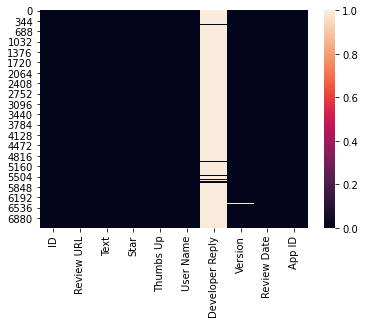

In [120]:
sns.heatmap(df.isnull())

In [121]:
df = df.drop('Developer Reply', axis = 1)
df = df.dropna()

<AxesSubplot:>

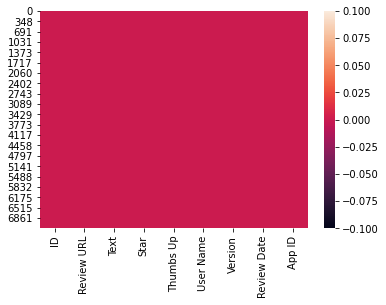

In [122]:
sns.heatmap(df.isnull())

In [123]:
df.shape

(7118, 9)

<AxesSubplot:xlabel='Star', ylabel='count'>

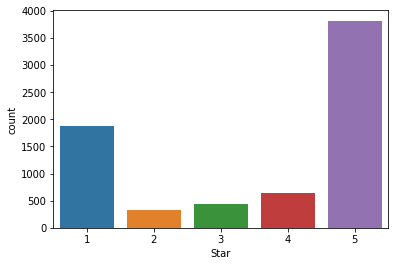

In [124]:
sns.countplot(x = df['Star'])

In [125]:
df[df['Star']<=2]

,ID,Review URL,Text,Star,Thumbs Up,User Name,Version,Review Date,App ID
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,85.0.4183.127,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,87.0.4280.66,2020-12-19,com.android.chrome
8,3894,https://play.google.com/store/apps/details?id=...,Very bad app 😞,1,0,Akshat Bhardwaj,78.0.3904.96,2020-12-19,com.android.chrome
9,3895,https://play.google.com/store/apps/details?id=...,Many times I tried to update its not updating....,1,0,Aditi Rathor,86.0.4240.198,2020-12-19,com.android.chrome
12,3898,https://play.google.com/store/apps/details?id=...,App is not getting update and it is not gettin...,1,0,Daksh Gulati,83.0.4103.106,2020-12-19,com.android.chrome
15,3901,https://play.google.com/store/apps/details?id=...,Very coming in real status. Thank you,1,0,Richyy Gonzalez,87.0.4280.86,2020-12-19,com.android.chrome
19,3905,https://play.google.com/store/apps/details?id=...,I want to download greana free fire but that n...,1,0,Dinkar Kamble,87.0.4280.101,2020-12-19,com.android.chrome
30,3916,https://play.google.com/store/apps/details?id=...,Data consuming,1,0,Aniket Sahu,87.0.4280.101,2020-12-19,com.android.chrome
31,3917,https://play.google.com/store/apps/details?id=...,My phone is samsung s9 and I can't update the app,1,0,Suman Rajora,81.0.4044.138,2020-12-19,com.android.chrome
32,3918,https://play.google.com/store/apps/details?id=...,"It lags this days. Worst of it, I can't even u...",1,0,Arcksonrinder Oyewole,84.0.4147.125,2020-12-19,com.android.chrome


In [126]:
#Cleaning Text

df['cleanText'] = hero.clean(df['Text'])

### Sentiment Analysis

Here I am creating columns that depict sentiment in the text. We can use these columns to check which 

In [127]:
vaderobj = SentimentIntensityAnalyzer()

In [128]:
df['VaderPos'] = df.apply(lambda row : vaderobj.polarity_scores(row['cleanText'])['pos'], axis = 1)
df['VaderNeg'] = df.apply(lambda row : vaderobj.polarity_scores(row['cleanText'])['neg'], axis = 1)
df['Blob Rating'] = df.apply(lambda row : TextBlob(row['cleanText']).sentiment[0], axis = 1)

In [129]:
#df[['Vader Rating','Blob Rating']].corr()

In [130]:
#sns.jointplot(x = 'Vader Rating', y = 'Blob Rating', data = df)

In [144]:
mismatch = df[(df['Star']<=2) & (df['VaderPos'] > 0.5) & (df['Blob Rating']>0)][['cleanText','Star','VaderPos','VaderNeg','Blob Rating']]
mismatch

,cleanText,Star,VaderPos,VaderNeg,Blob Rating
42,okk kind bad brave,1,0.602,0.310,0.233333
101,good,1,1.000,0.000,0.700000
258,best app browsing,1,0.677,0.000,1.000000
277,dark mode acting changing screen light super b...,1,0.554,0.135,0.173810
291,ok,1,1.000,0.000,0.500000
310,best,1,1.000,0.000,1.000000
312,good,1,1.000,0.000,0.700000
315,nice,1,1.000,0.000,0.600000
371,good,1,1.000,0.000,0.700000
389,good,1,1.000,0.000,0.700000


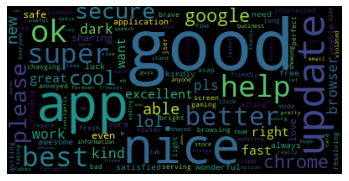

In [150]:
#Generating Wordcloud of filtered words

wordcloud = WordCloud().generate(' '.join(mismatch['cleanText']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Hence these filtered rows were flawed

### References

* [Is it possible to do sentiment analysis of unlabelled text using word2vec model?](https://stackoverflow.com/questions/61185290/is-it-possible-to-do-sentiment-analysis-of-unlabelled-text-using-word2vec-model)

* [Amazon Review Rating Prediction with NLP](https://medium.com/data-science-lab-spring-2021/amazon-review-rating-prediction-with-nlp-28a4acdd4352)